In [1]:
import os
import pandas as pd
import numpy as np
import glob

desired_width = 320
pd.set_option('display.width', desired_width)
np.set_printoptions(linewidth=desired_width)
pd.set_option('display.max_columns', 10)

In [2]:
##############################################################################
# Load and clean Rating data                                                 #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\Rating.csv'
df_ratings_raw = pd.read_csv(path)

# drop RatingSPOutlook,RatingSPOutlook columns
df_ratings_no_xtra_col = df_ratings_raw.drop(columns=['RatingSPOutlook', 'RatingSPOutlook.1'])

# drop NA from RatingSP column
df_ratings_clean = df_ratings_no_xtra_col.dropna(subset=['RatingSP'])

# calculate mean per security by removing KeyDate
df_ratings_clean = df_ratings_clean.drop(columns=['KeyDate'])
df_ratings_with_mean = df_ratings_clean.groupby(['SecurityID']).mean()
df_ratings_with_mean.reset_index()

,SecurityID,RatingSP
0,64,10.000000
1,72,13.000000
2,78,14.652361
3,82,15.000000
4,83,14.652361
...,...,...
17918,72406,14.000000
17919,72407,14.000000
17920,72504,17.000000
17921,72675,8.000000


In [3]:
##############################################################################
# Load and clean Spreads data                                                #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\raw_data_files'
all_files = glob.glob(os.path.join(path, "*.csv"))  # use os.path.join to make concat OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
df_merged = pd.concat(df_from_each_file, ignore_index=True, sort=False)

In [4]:
# drop N/A from spreads data
df_merged = df_merged.dropna(how='any')
# convert dates to Date type
df_merged['KeyDate'] = pd.to_datetime(df_merged['KeyDate'], errors='coerce')

# Extract the low liers
dates_low_liers = df_merged["KeyDate"].value_counts()
dates_low_liers = dates_low_liers[dates_low_liers < 500]

# clean the dataset by removing the low liers and NaNs
df_merged_clean = df_merged[~df_merged['KeyDate'].isin(dates_low_liers.index)]

# drop rows after March 10th 2020
indexDates = df_merged_clean[ df_merged_clean['KeyDate'] > '2020-03-01' ].index
df_merged_clean.drop(indexDates , inplace=True)

# drop KeyDate column
#df_data_values = df_merged_clean.drop(columns=['KeyDate'])

# group by security and average all other columns
#df_data_values_with_mean = df_data_values.groupby(['SecurityID']).mean()
#df_data_values_with_mean.reset_index()

In [5]:
df_merged_clean.head(25)

,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,AmtOutstanding,GSpread,OAS_Spread,ZSpread,AswUsd
0,64,2018-12-31,91.0976,6.49918,6.06004,...,1.697266e+09,389.13,345.604,385.493,357.653
1,64,2019-01-02,90.8950,6.53581,6.05466,...,1.697266e+09,399.42,351.010,390.586,361.970
2,64,2019-01-03,90.8199,6.55070,6.04601,...,1.697266e+09,409.20,365.010,405.634,375.736
3,64,2019-01-04,92.0500,6.33260,6.06068,...,1.697266e+09,381.59,329.922,371.585,346.809
4,64,2019-01-07,93.4350,6.09098,6.07716,...,1.697266e+09,347.39,300.014,344.978,324.979
5,64,2019-01-08,94.1644,5.96554,6.08450,...,1.697266e+09,331.30,281.457,328.040,310.566
6,64,2019-01-09,94.7400,5.86738,6.08968,...,1.697266e+09,323.50,270.271,318.174,302.289
7,64,2019-01-10,94.3312,5.93815,6.07661,...,1.697266e+09,327.72,278.369,324.706,307.612
8,64,2019-01-11,94.4928,5.91076,6.07625,...,1.697266e+09,329.24,278.423,325.285,308.512
9,64,2019-01-14,94.0064,5.99462,6.06718,...,1.697266e+09,337.70,287.512,332.855,314.662


In [6]:
##############################################################################
# Load and clean Securities meta data                                        #
##############################################################################
path = r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\SecurityData.csv'  # use your path
df_securities = pd.read_csv(path)

# filter out CountryDomicile=US
df_securities_US = df_securities.loc[df_securities['CountryDomicile'] == 'US']

##############################################################################
# Merge all the datasets into one DataFrame / File                           #
##############################################################################

# left join RatingSP from df_rating on df_securities and replace NA with zero
df_securities_US_w_avg_rating = df_securities_US.merge(df_ratings_with_mean, on=['SecurityID'], how='left')
df_securities_US_w_avg_rating['RatingSP'] = df_securities_US_w_avg_rating['RatingSP'].fillna(0)
df_securities_US_w_avg_rating.head(50)

,SecurityID,OfficialName,SecurityType,SecuritySubType,SecurityBBGType,...,AmountIssued,MinIncrement,MinPiece,BBGDescription,RatingSP
0,64,POST 5 08/15/26,Bond,Bond,PRIV PLACEMENT,...,1.750000e+09,1000.0,2000.0,NaN,10.000000
1,82,ATT 5.45 03/01/2047 Callable USD SENIOR_UNSECURED,Bond,Bond,GLOBAL,...,2.000000e+09,1000.0,2000.0,NaN,15.000000
2,83,AER 8.25 12/15/20,Bond,Bond,US DOMESTIC,...,1.000000e+09,1000.0,2000.0,NaN,14.652361
3,87,CNHI 4.375 04/05/22,Bond,Bond,US DOMESTIC,...,5.000000e+08,1000.0,2000.0,NaN,15.000000
4,95,LPLA 5.75 09/15/2025 USD 144A,Bond,Bond,PRIV PLACEMENT,...,9.000000e+08,1000.0,2000.0,NaN,11.785088
5,109,ATT 4.25 03/01/27,Bond,Bond,GLOBAL,...,2.000000e+09,1000.0,2000.0,NaN,15.000000
6,110,FTR 10.5 09/15/22,Bond,Bond,GLOBAL,...,2.183426e+09,1000.0,2000.0,ISS'D IN EXCH OF 144A/REGS SEC; SEE CUSIP 3590...,4.819742
7,121,AER 4.625 04/15/2021 USD,Bond,Bond,GLOBAL,...,5.000000e+08,1000.0,2000.0,NaN,14.652361
8,126,BKNG 2.15 11/25/22,Bond,Bond,EURO NON-DOLLAR,...,7.500000e+08,1000.0,100000.0,NaN,0.000000
9,130,BGCP 5.125 05/27/2021 Bullet USD SENIOR_UNSECURED,Bond,Bond,GLOBAL,...,2.850000e+08,1000.0,2000.0,ISS'D IN EXCH OF 144A/REGS SEC; SEE CUSIP 0554...,14.000000


In [7]:
# left join all columns by SecurityID from df_avg_data_values into df_securities_US_w_avg_rating
df_securities_US_w_data = df_merged_clean.merge(df_securities_US_w_avg_rating, on=['SecurityID'], how='left')

# drop rows from df_securities_US_w_data without average spreads
df_securities_US_w_data_clean = df_securities_US_w_data.dropna(subset=['Price', 'YieldWorst', 'ModifiedDuration_Plain',
                                                                       'AmtOutstanding', 'GSpread', 'OAS_Spread', 
                                                                       'ZSpread', 'AswUsd', 'CountryDomicile'])

# TEMP - output df_securities to US_Securities_with_AVG_Rating_AVG_Spreads.csv
#df_securities_US_w_data_clean.to_csv(r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\US_Securities_with_AVG_Rating_AVG_Spreads.csv')

#df_US_spreads = df_merged_clean.loc[df_merged_clean['CountryDomicile'] == 'US']

In [8]:
df_securities_US_w_data_clean.head(500)

,SecurityID,KeyDate,Price,YieldWorst,ModifiedDuration_Plain,...,AmountIssued,MinIncrement,MinPiece,BBGDescription,RatingSP
0,64,2018-12-31,91.0976,6.49918,6.06004,...,1.750000e+09,1000.0,2000.0,NaN,10.0
1,64,2019-01-02,90.8950,6.53581,6.05466,...,1.750000e+09,1000.0,2000.0,NaN,10.0
2,64,2019-01-03,90.8199,6.55070,6.04601,...,1.750000e+09,1000.0,2000.0,NaN,10.0
3,64,2019-01-04,92.0500,6.33260,6.06068,...,1.750000e+09,1000.0,2000.0,NaN,10.0
4,64,2019-01-07,93.4350,6.09098,6.07716,...,1.750000e+09,1000.0,2000.0,NaN,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1075,82,2019-10-23,119.3390,4.23677,15.22280,...,2.000000e+09,1000.0,2000.0,NaN,15.0
1076,82,2019-10-24,119.6750,4.21805,15.23490,...,2.000000e+09,1000.0,2000.0,NaN,15.0
1077,82,2019-10-25,120.0160,4.19923,15.25100,...,2.000000e+09,1000.0,2000.0,NaN,15.0
1078,82,2019-10-28,119.8640,4.20754,15.24110,...,2.000000e+09,1000.0,2000.0,NaN,15.0


In [9]:
df_securities_US_w_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785579 entries, 0 to 4429433
Data columns (total 59 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   SecurityID              int64         
 1   KeyDate                 datetime64[ns]
 2   Price                   float64       
 3   YieldWorst              float64       
 4   ModifiedDuration_Plain  float64       
 5   WorkoutDate             object        
 6   AmtOutstanding          float64       
 7   GSpread                 float64       
 8   OAS_Spread              float64       
 9   ZSpread                 float64       
 10  AswUsd                  float64       
 11  OfficialName            object        
 12  SecurityType            object        
 13  SecuritySubType         object        
 14  SecurityBBGType         object        
 15  SecurityBBGYellowKey    object        
 16  Series                  object        
 17  SecuritySector          object        
 18  Se

In [10]:
from sklearn import metrics
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from scipy.spatial.distance import cdist

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from time import time

%matplotlib inline

In [11]:
df_all = df_securities_US_w_data_clean[['SecurityID', 'KeyDate', 'GSpread', 'Price']]
df_all.head(25)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2785579 entries, 0 to 4429433
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   SecurityID  int64         
 1   KeyDate     datetime64[ns]
 2   GSpread     float64       
 3   Price       float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 106.3 MB


In [12]:
df_all = df_all.set_index(['KeyDate'])
df_all.head(50)

,SecurityID,GSpread,Price
KeyDate,,,
2018-12-31,64,389.13,91.0976
2019-01-02,64,399.42,90.8950
2019-01-03,64,409.20,90.8199
2019-01-04,64,381.59,92.0500
2019-01-07,64,347.39,93.4350
2019-01-08,64,331.30,94.1644
2019-01-09,64,323.50,94.7400
2019-01-10,64,327.72,94.3312
2019-01-11,64,329.24,94.4928


C:\Users\mbrag\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


<AxesSubplot:xlabel='KeyDate'>

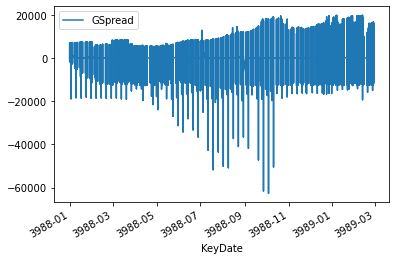

In [13]:
df_all_GS = df_all[['GSpread']]
df_all_GS.plot()

In [14]:
df_all.head()

,SecurityID,GSpread,Price
KeyDate,,,
2018-12-31,64,389.13,91.0976
2019-01-02,64,399.42,90.8950
2019-01-03,64,409.20,90.8199
2019-01-04,64,381.59,92.0500
2019-01-07,64,347.39,93.4350


In [15]:
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [16]:
# Adding 3 separate columns for year, month, and day
df_all['year'] = df_all.index.year
df_all['month'] = df_all.index.month
df_all['day'] = df_all.index.day

<AxesSubplot:title={'center':'Closing Prices (Monthwise)'}, xlabel='KeyDate'>

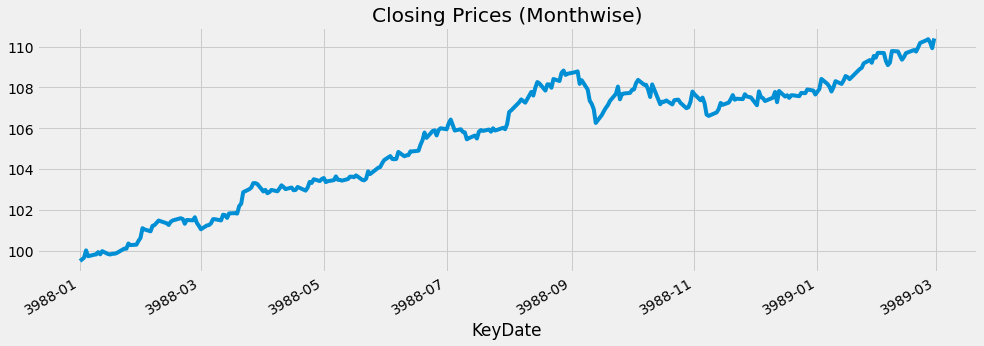

In [17]:
temp=df_all.groupby(['KeyDate'])['Price'].mean() 
temp.plot(figsize=(15,5), title= 'Closing Prices (Monthwise)', fontsize=14)

In [18]:
# Dickey-Fuller test


def test_stationarity(timeseries):
    adft = adfuller(timeseries,autolag='AIC')
 
 # output for dft will give us without defining what the values are.
 # hence we manually write what values does it explains using a for loop

    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values

    return output



df_final = pd.DataFrame(columns = ['Test Statistics','p-value','No. of lags used',
                                   'Number of observations used','SecurityID',
                                  'critical value (1%)','critical value (5%)','critical value (10%)'])
data = []

for i, r in df_securities_US_w_avg_rating.iterrows():

    df_sec_timeseries_metrics = df_all.loc[df_all['SecurityID'] == r['SecurityID']]
    if len(df_sec_timeseries_metrics) < 4:
        continue
    output = test_stationarity(df_sec_timeseries_metrics['GSpread'])
    output['SecurityID'] = r['SecurityID']

    data.append(output)

#     if i == 5: 
#         break

df_final = df_final.append(data, True)

print(df_final.head())
print(df_final.info())

   Test Statistics   p-value  No. of lags used  Number of observations used  SecurityID  critical value (1%)  critical value (5%)  critical value (10%)
0        -2.183780  0.212185               9.0                        281.0        64.0            -3.453838            -2.871881             -2.572280
1        -2.781794  0.060922               4.0                        286.0        82.0            -3.453423            -2.871699             -2.572183
2        -3.074159  0.028526               7.0                        282.0        83.0            -3.453754            -2.871844             -2.572261
3        -2.579467  0.097316               2.0                        287.0        87.0            -3.453342            -2.871664             -2.572164
4        -2.549120  0.103976               8.0                        281.0        95.0            -3.453838            -2.871881             -2.572280
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11615 entries, 0 to 11614
Data columns

In [19]:
df_final.to_csv(r'C:\Users\mbrag\PycharmProjects\RPIA-Capstone\Time-Series-Features-US-Securites.csv')

# Experiments and feature engineering using 1 security

In [20]:
df_64 = df_securities_US_w_data_clean.loc[df_securities_US_w_data_clean['SecurityID'] == 64]

df_64 = df_64[['KeyDate','Price']] 

In [21]:
df_64.head(25)

,KeyDate,Price
0,2018-12-31,91.0976
1,2019-01-02,90.8950
2,2019-01-03,90.8199
3,2019-01-04,92.0500
4,2019-01-07,93.4350
5,2019-01-08,94.1644
6,2019-01-09,94.7400
7,2019-01-10,94.3312
8,2019-01-11,94.4928
9,2019-01-14,94.0064


In [22]:
df_64 = df_64.set_index(['KeyDate'])
df_64.head(50)

,Price
KeyDate,
2018-12-31,91.0976
2019-01-02,90.8950
2019-01-03,90.8199
2019-01-04,92.0500
2019-01-07,93.4350
2019-01-08,94.1644
2019-01-09,94.7400
2019-01-10,94.3312
2019-01-11,94.4928


<AxesSubplot:xlabel='KeyDate'>

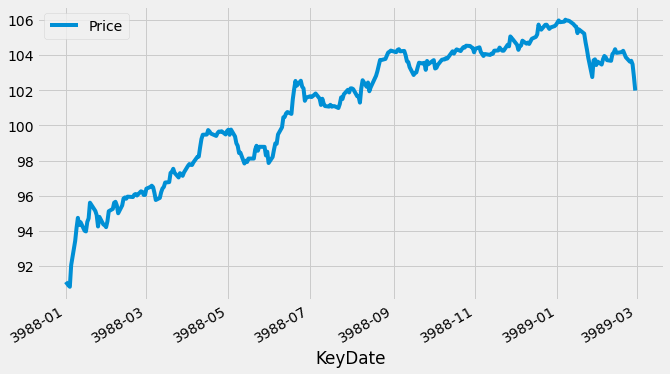

In [23]:
df_64.plot()

In [24]:
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [25]:
#check datatype of index
df_64.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11', '2019-01-14',
               ...
               '2020-02-14', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', name='KeyDate', length=291, freq=None)

In [26]:
# Adding 3 separate columns for year, month, and day
df_64['year'] = df_64.index.year
df_64['month'] = df_64.index.month
df_64['day'] = df_64.index.day

In [27]:
# Display a random sampling of 5 rows
df_64.sample(5, random_state=0)

,Price,year,month,day
KeyDate,,,,
2019-11-25,104.587,2019,11,25
2020-02-19,104.246,2020,2,19
2019-10-30,104.405,2019,10,30
2019-09-05,104.334,2019,9,5
2019-06-20,102.530,2019,6,20


<AxesSubplot:title={'center':'Closing Prices (Monthwise)'}, xlabel='KeyDate'>

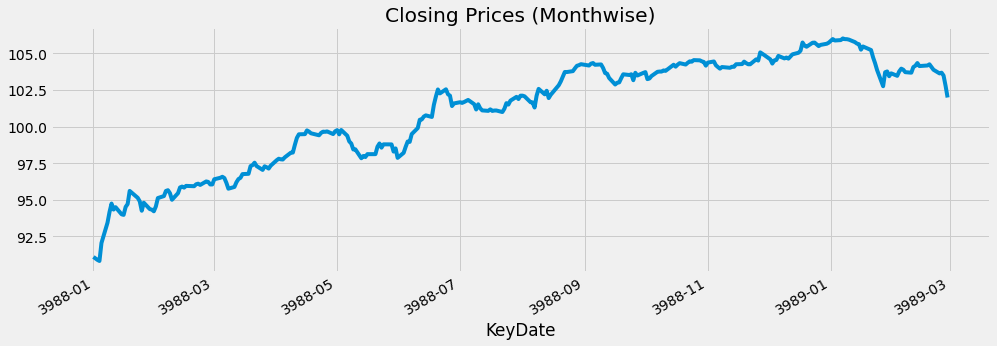

In [28]:
temp=df_64.groupby(['KeyDate'])['Price'].mean() 
temp.plot(figsize=(15,5), title= 'Closing Prices (Monthwise)', fontsize=14)

<AxesSubplot:xlabel='month'>

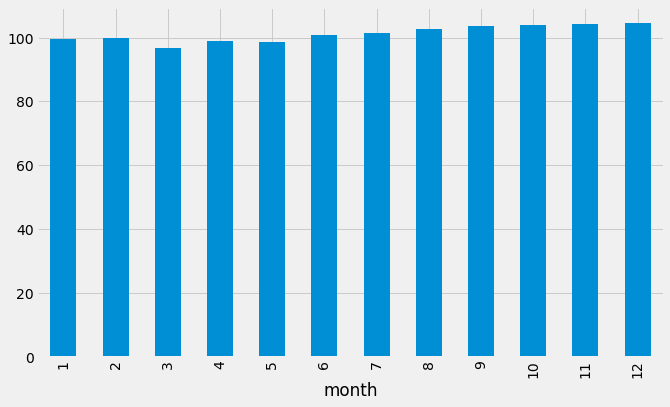

In [29]:
df_64.groupby('month')['Price'].mean().plot.bar()

In [30]:
test = df_64[269:]
train = df_64[:268]

<AxesSubplot:xlabel='KeyDate'>

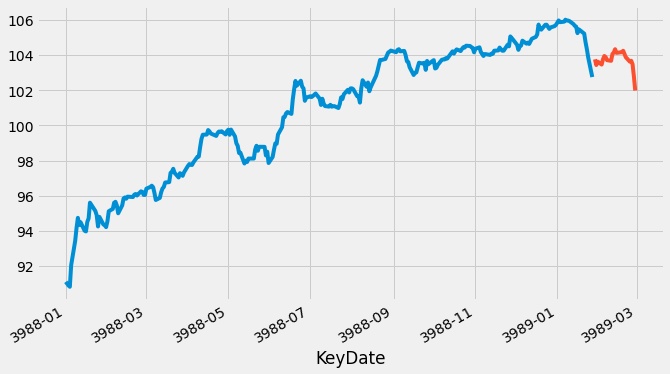

In [31]:
df_train = train.groupby(['KeyDate'])['Price'].mean() 
df_test = test.groupby(['KeyDate'])['Price'].mean() 
df_train.plot()
df_test.plot()

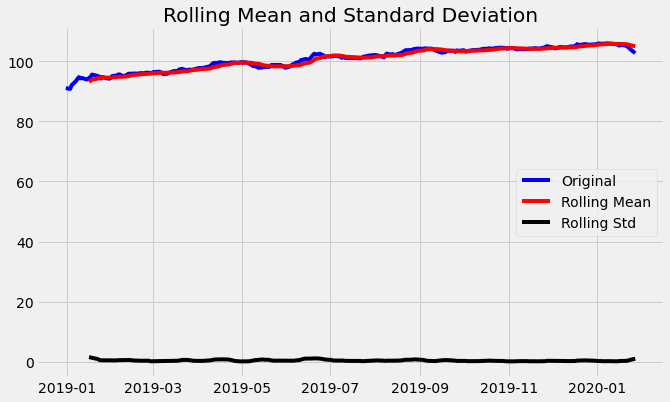

Results of dickey fuller test
Test Statistics                 -3.054184
p-value                          0.030135
No. of lags used                 2.000000
Number of observations used    265.000000
critical value (1%)             -3.455270
critical value (5%)             -2.872509
critical value (10%)            -2.572615
dtype: float64


In [32]:
# Dickey-Fuller test.

def test_stationarity(timeseries):
     
# Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
 #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
 
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
 
 # output for dft will give us without defining what the values are.
 # hence we manually write what values does it explains using a for loop
 
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

test_stationarity(train['Price'])

# Making the time series stationary
# Removing Trend 

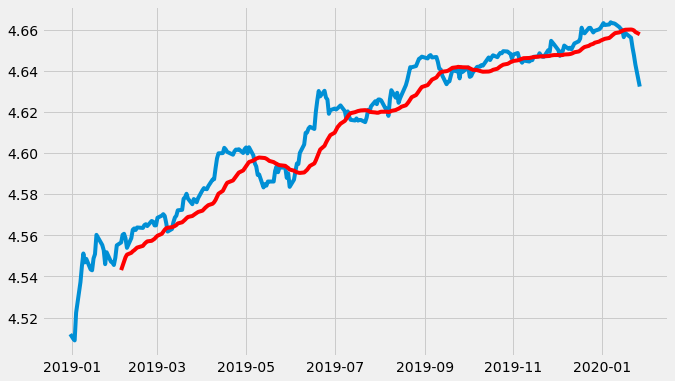

In [33]:
train_log = np.log(train['Price']) 
test_log = np.log(test['Price'])
moving_avg = train_log.rolling(24).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [34]:
train_log_moving_avg_diff = train_log - moving_avg

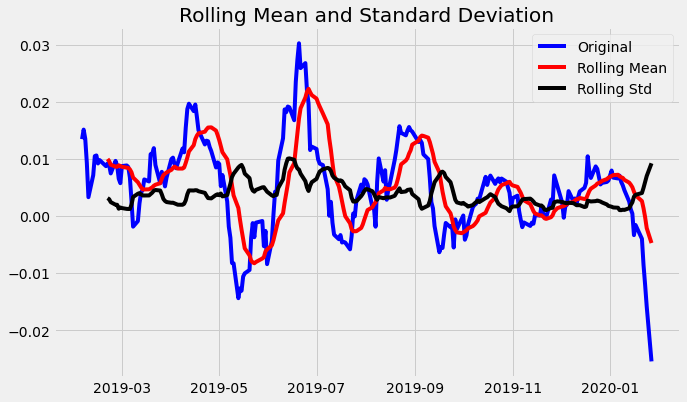

Results of dickey fuller test
Test Statistics                 -2.393226
p-value                          0.143657
No. of lags used                 3.000000
Number of observations used    241.000000
critical value (1%)             -3.457779
critical value (5%)             -2.873609
critical value (10%)            -2.573202
dtype: float64


In [35]:
train_log_moving_avg_diff.dropna(inplace = True), 
test_stationarity(train_log_moving_avg_diff)

NOT: We can see that the Test Statistic is less than the Critical Value 
and the p-value is less than 5%. So, we can be confident that the trend is almost removed.
Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

# Differencing can help to make the series stable and eliminate the trend.

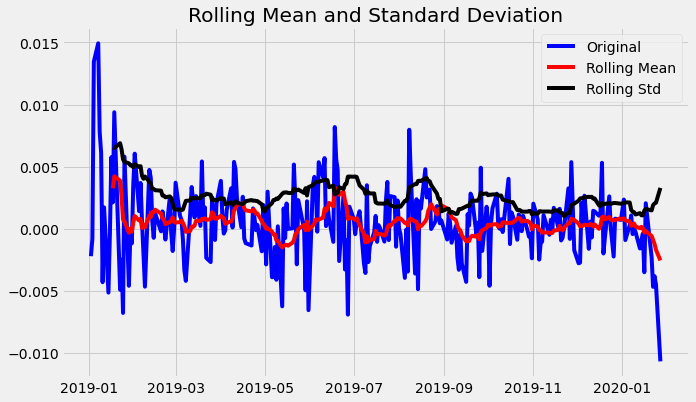

Results of dickey fuller test
Test Statistics               -8.503671e+00
p-value                        1.219086e-13
No. of lags used               1.000000e+00
Number of observations used    2.650000e+02
critical value (1%)           -3.455270e+00
critical value (5%)           -2.872509e+00
critical value (10%)          -2.572615e+00
dtype: float64


In [36]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

Now we will decompose the time series into trend 
and seasonality and will get the residual which is the random variation in the series.
We use the code below to check the stationarity of residuals.

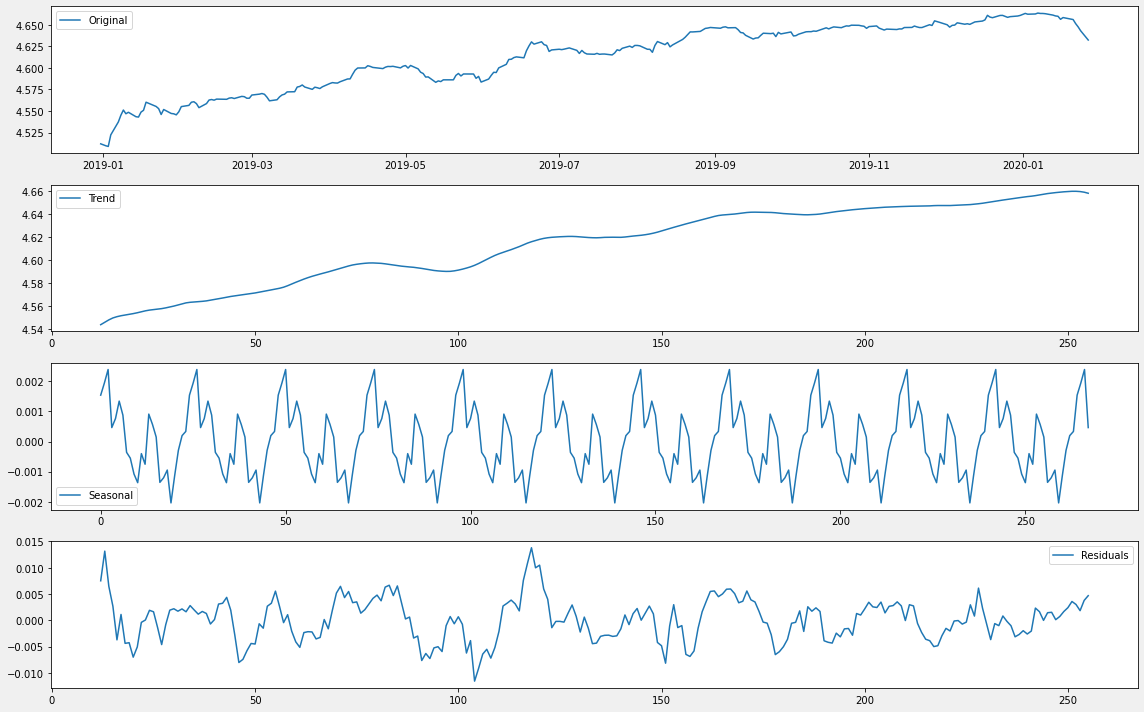

In [37]:
plt.figure(figsize = (16,10))
decomposition = seasonal_decompose(pd.DataFrame(train_log).Price.values, freq = 24)
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

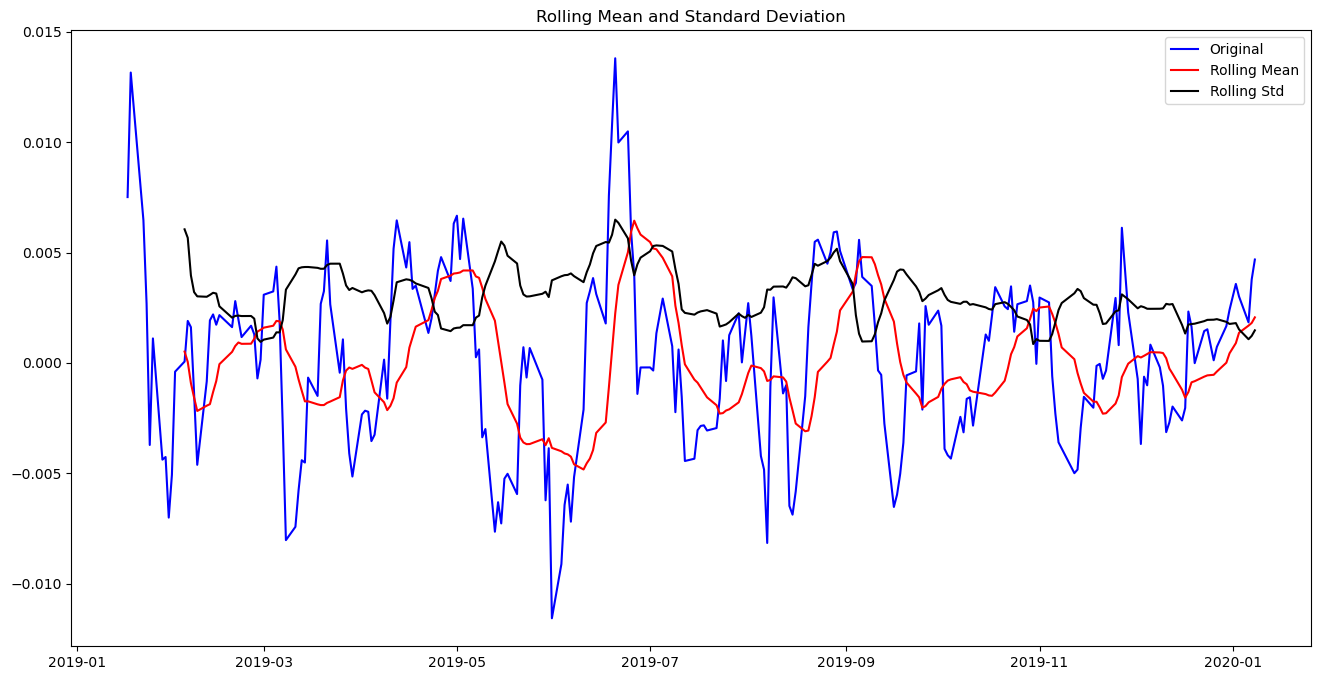

Results of dickey fuller test
Test Statistics               -6.125477e+00
p-value                        8.650111e-08
No. of lags used               2.000000e+00
Number of observations used    2.410000e+02
critical value (1%)           -3.457779e+00
critical value (5%)           -2.873609e+00
critical value (10%)          -2.573202e+00
dtype: float64


In [38]:
plt.figure(figsize = (16,8))
train_log_decompose = pd.DataFrame(residual)
train_log_decompose['KeyDate'] = train_log.index
train_log_decompose.set_index('KeyDate', inplace = True)
train_log_decompose.dropna(inplace = True)
test_stationarity(train_log_decompose[0])

In [39]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(train_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(train_log_diff.dropna(), nlags = 25, method= "ols")

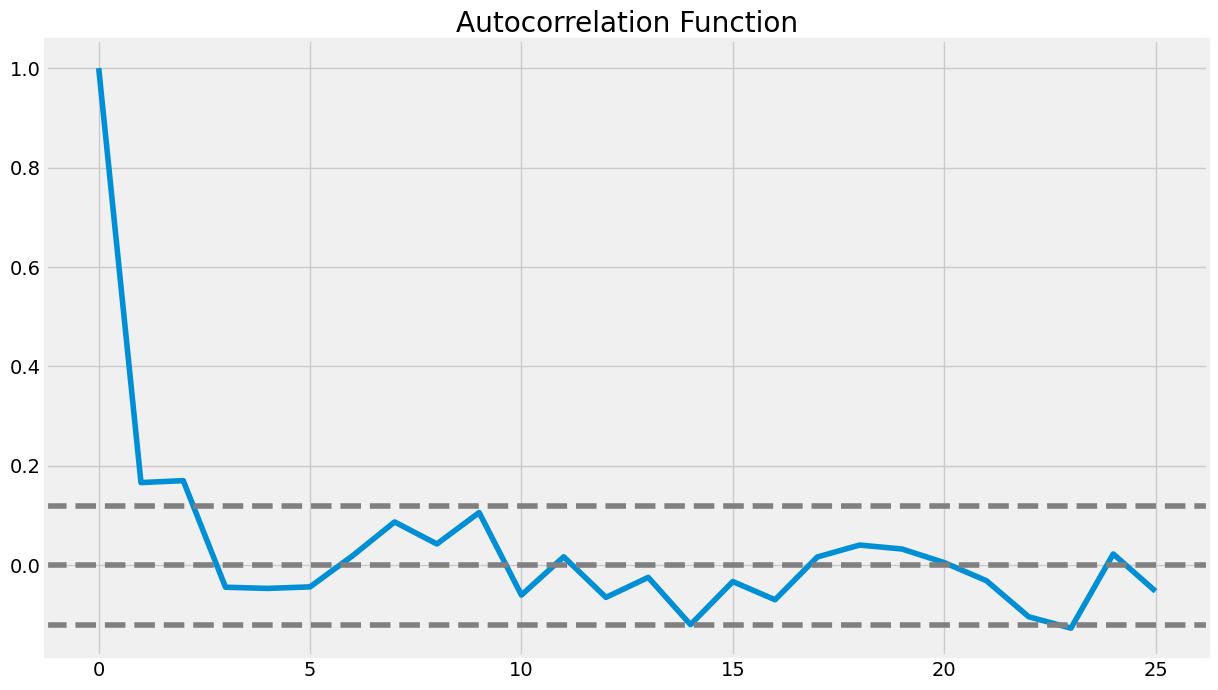

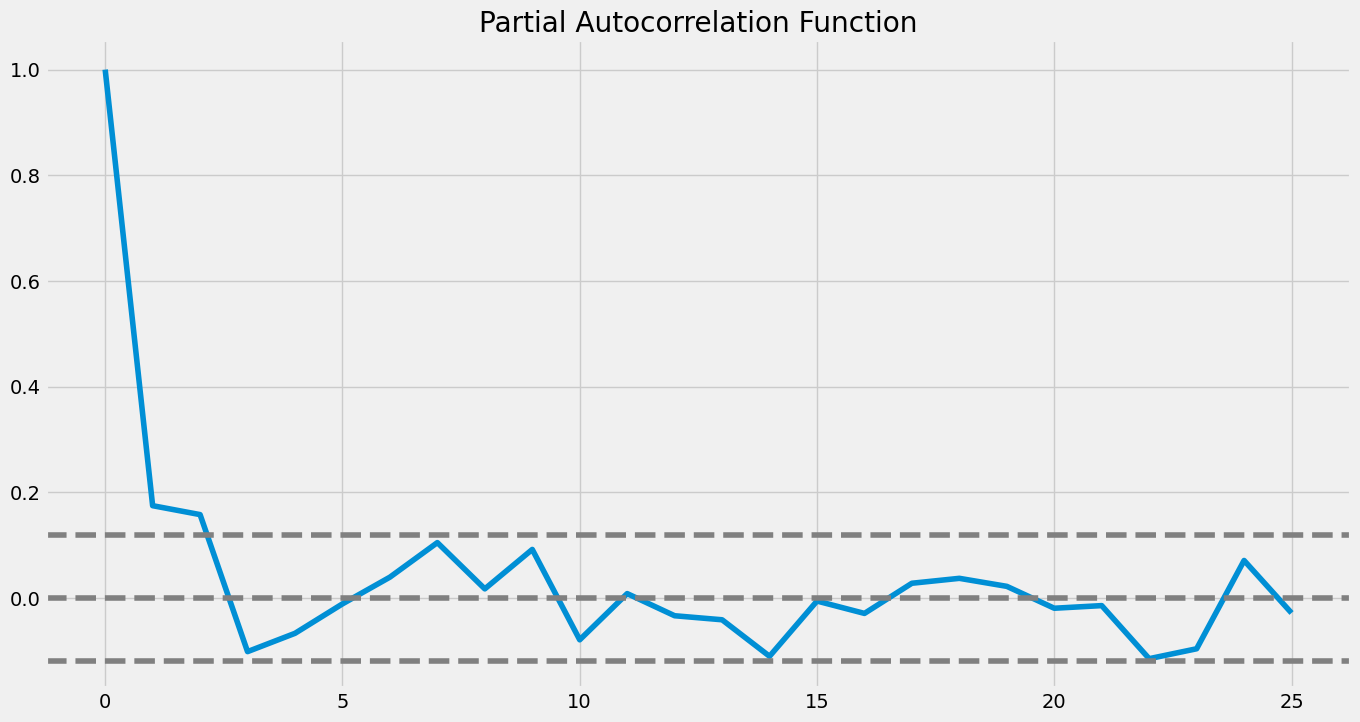

In [40]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline(y = 1.96 /np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Autocorrelation Function")
plt.show()
# PACF
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.axhline( y = 1.96/np.sqrt(len(train_log_diff.dropna())), linestyle = "--", color = "gray")
plt.title("Partial Autocorrelation Function")
plt.show()
